In [1]:
pip install numpy matplotlib pandas

Defaulting to user installation because normal site-packages is not writeable
  Using cached matplotlib-3.10.7-cp313-cp313-win_amd64.whl.metadata (11 kB)
  Using cached contourpy-1.3.3-cp313-cp313-win_amd64.whl.metadata (5.5 kB)
Using cached matplotlib-3.10.7-cp313-cp313-win_amd64.whl (8.1 MB)
Using cached contourpy-1.3.3-cp313-cp313-win_amd64.whl (226 kB)

   ---------------------------------------- 0/2 [contourpy]
   ---------------------------------------- 0/2 [contourpy]
   ---------------------------------------- 0/2 [contourpy]
   ---------------------------------------- 0/2 [contourpy]
   -------------------- ------------------- 1/2 [matplotlib]
   -------------------- ------------------- 1/2 [matplotlib]
   -------------------- ------------------- 1/2 [matplotlib]
   -------------------- ------------------- 1/2 [matplotlib]
   -------------------- ------------------- 1/2 [matplotlib]
   -------------------- ------------------- 1/2 [matplotlib]
   -------------------- ----------


[notice] A new release of pip is available: 25.2 -> 25.3
[notice] To update, run: C:\Users\nurri\AppData\Local\Microsoft\WindowsApps\PythonSoftwareFoundation.Python.3.13_qbz5n2kfra8p0\python.exe -m pip install --upgrade pip


In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

# --- PARAMETER NPM KELOMPOK (54, 56, 70) ---
# Anggota 1 (..54) -> a = 4
# Anggota 2 (..56) -> b = 6
# Anggota 3 (..74) -> c = 4
# Hitung d: (4 + 6 + 4) mod 10 = 4

a = 4
b = 6
c = 4
d = 4

# Definisi Fungsi Lengkap sesuai rumus umum
# f(x) = a*e^(-x) + b*sin(c*x) - d
def f(x):
    return (a * np.exp(-x)) + (b * np.sin(c * x)) - d

print("Fungsi Kelompok didefinisikan dengan parameter dari NPM anggota:")
print(f"Anggota 1: NPM ...54 -> a = {a}")
print(f"Anggota 2: NPM ...56 -> b = {b}")
print(f"Anggota 3: NPM ...74 -> c = {c}")
print(f"Hitung d: ({a} + {b} + {c}) mod 10 = {d}")
print("\nFungsi f(x) kelompok dalam bentuk matematika:")
print(f"f(x) = {a} * e^(-x) + {b} * sin({c} * x) - {d}")

Fungsi Kelompok didefinisikan dengan parameter dari NPM anggota:
Anggota 1: NPM ...54 -> a = 4
Anggota 2: NPM ...56 -> b = 6
Anggota 3: NPM ...74 -> c = 4
Hitung d: (4 + 6 + 4) mod 10 = 4

Fungsi f(x) kelompok dalam bentuk matematika:
f(x) = 4 * e^(-x) + 6 * sin(4 * x) - 4
Rumus Python: (a * np.exp(-x)) + (b * np.sin(c * x)) - d


In [24]:
# 1. Fungsi Interpolasi Lagrange
def lagrange_interpolation(x_points, y_points, x_test, verbose=False):
    n = len(x_points)
    L = np.zeros(n)
    y_interp = 0
    
    if verbose:
        print(f"\n--- Perhitungan Interpolasi Lagrange untuk x = {x_test} ---")
        print("Rumus: P(x) = Σ y_i * L_i(x), di mana L_i(x) = Π_{j≠i} (x - x_j) / (x_i - x_j)")
        print(f"Titik data: x = {[round(x, 1) for x in list(x_points)]}, y = {[round(y, 4) for y in list(y_points)]}")
    
    for i in range(n):
        L[i] = 1
        if verbose:
            print(f"\nMenghitung L_{i}({x_test}):")
        for j in range(n):
            if i != j:
                term = (x_test - x_points[j]) / (x_points[i] - x_points[j])
                L[i] *= term
                if verbose:
                    print(f"  L_{i} *= ({x_test} - {x_points[j]:.1f}) / ({x_points[i]:.1f} - {x_points[j]:.1f}) = {term:.6f} -> L_{i} = {L[i]:.6f}")
        contrib = y_points[i] * L[i]
        y_interp += contrib
        if verbose:
            print(f"  Kontribusi: y_{i} * L_{i} = {y_points[i]:.6f} * {L[i]:.6f} = {contrib:.6f}")
            print(f"  P(x) sekarang: {y_interp:.6f}")
        
    if verbose:
        print(f"\nHasil akhir: P({x_test}) = {y_interp:.6f}")
    return y_interp

# 3. Fungsi Interpolasi Newton Maju
def newton_forward_interpolation(x_points, y_points, x_test, verbose=False):
    n = len(x_points)
    # Hitung tabel selisih terbagi
    coef_df = divided_diff_table(x_points, y_points)
    coef = coef_df.values  # Ambil array numpy
    
    if verbose:
        print(f"\n--- Perhitungan Interpolasi Newton Maju untuk x = {x_test} ---")
        print("Rumus: P(x) = f[x0] + (x - x0) * f[x0,x1] + (x - x0)(x - x1) * f[x0,x1,x2] + ...")
        print(f"Titik data: x = {[round(x, 1) for x in list(x_points)]}, y = {[round(y, 4) for y in list(y_points)]}")
        print("Koefisien diambil dari tabel selisih terbagi maju:")
        display(coef_df)
    
    # Koefisien: coef[0][0] = f[x0], coef[0][1] = f[x0,x1], dll.
    p = coef[0][0]  # f[x0]
    if verbose:
        print(f"P(x) = {p:.6f}")
    
    for i in range(1, n):
        term = coef[0][i]
        for j in range(i):
            term *= (x_test - x_points[j])
        p += term
        if verbose:
            print(f" + {coef[0][i]:.6f} * " + " * ".join([f"(x - {x_points[j]:.1f})" for j in range(i)]) + f" = {term:.6f} -> P(x) = {p:.6f}")
    
    if verbose:
        print(f"\nHasil akhir: P({x_test}) = {p:.6f}")
    return p

In [28]:
# --- PARAMETER INPUT ---

# 1. Tentukan Interval dan Titik Data (Minimal 4 titik) 
# Misal kita ambil interval [0, 2]
x_data = np.array([0.0, 0.5, 1.0, 2.0]) 
y_data = f(x_data) # Hitung y pasangannya menggunakan fungsi asli

# 2. Tentukan Titik Uji (x yang ingin ditebak nilainya) [cite: 81]
# Syarat: Tidak boleh sama dengan x_data
x_uji = 1.5 

# Hitung nilai interpolasi di titik uji menggunakan Lagrange
y_hasil_lagrange = lagrange_interpolation(x_data, y_data, x_uji)
y_sejati = f(x_uji)

# Hitung nilai interpolasi di titik uji menggunakan Newton Maju
y_hasil_newton = newton_forward_interpolation(x_data, y_data, x_uji)

# Tampilkan detail perhitungan Lagrange untuk x_uji
print("--- Detail Perhitungan Lagrange untuk x = 1.5 ---")
n = len(x_data)
L = np.zeros(n)
y_interp = 0
for i in range(n):
    L[i] = 1
    for j in range(n):
        if i != j:
            L[i] *= (x_uji - x_data[j]) / (x_data[i] - x_data[j])
    contrib = y_data[i] * L[i]
    y_interp += contrib
    print(f"L_{i} = {L[i]:.6f}, y_{i} = {y_data[i]:.6f}, Kontribusi = {contrib:.6f}")
print(f"Total P({x_uji}) = {y_interp:.6f}")

# Buat tabel hasil perhitungan seperti di Excel
import pandas as pd

# Data untuk tabel: x, y_asli, y_interpolasi_lagrange, y_interpolasi_newton, error
x_all = np.append(x_data, x_uji)
y_asli_all = f(x_all)
y_interp_lagrange = [lagrange_interpolation(x_data, y_data, x) for x in x_all]
y_interp_newton = [newton_forward_interpolation(x_data, y_data, x) for x in x_all]
error_lagrange = np.abs(y_asli_all - y_interp_lagrange)
error_newton = np.abs(y_asli_all - y_interp_newton)

df_hasil = pd.DataFrame({
    'x': x_all,
    'f(x) Asli': y_asli_all,
    'P(x) Lagrange': y_interp_lagrange,
    'Error Lagrange': error_lagrange,
    'P(x) Newton Maju': y_interp_newton,
    'Error Newton': error_newton
})

print("\n--- Tabel Hasil Perhitungan Interpolasi ---")
display(df_hasil)

--- Detail Perhitungan Lagrange untuk x = 1.5 ---
L_0 = 0.250000, y_0 = 0.000000, Kontribusi = 0.000000
L_1 = -1.000000, y_1 = 3.881907, Kontribusi = -3.881907
L_2 = 1.500000, y_2 = -7.069297, Kontribusi = -10.603946
L_3 = 0.250000, y_3 = 2.477491, Kontribusi = 0.619373
Total P(1.5) = -13.866480

--- Tabel Hasil Perhitungan Interpolasi ---


,x,f(x) Asli,P(x) Lagrange,Error Lagrange,P(x) Newton Maju,Error Newton
0,0.0,0.000000,0.000000,0.000000,0.000000,0.000000e+00
1,0.5,3.881907,3.881907,0.000000,3.881907,0.000000e+00
2,1.0,-7.069297,-7.069297,0.000000,-7.069297,1.776357e-15
3,2.0,2.477491,2.477491,0.000000,2.477491,5.329071e-15
4,1.5,-4.783972,-13.866480,9.082508,-13.866480,9.082508e+00


In [26]:
def divided_diff_table(x, y):
    n = len(y)
    coef = np.zeros([n, n])
    coef[:,0] = y
    
    for j in range(1,n):
        for i in range(n-j):
            coef[i][j] = (coef[i+1][j-1] - coef[i][j-1]) / (x[i+j]-x[i])
            
    # Membuat DataFrame agar rapi
    df = pd.DataFrame(coef)
    columns = [f'f[x{i}]' if i==0 else f'Orde {i}' for i in range(n)]
    df.columns = columns
    df.index = x
    return df

print("--- Tabel Selisih Terbagi Maju ---")
print("Ini adalah selisih terbagi maju (forward divided differences), digunakan untuk interpolasi Newton maju.")
print("Rumus: f[x_i, x_{i+1}, ..., x_{i+k}] = (f[x_{i+1}, ..., x_{i+k}] - f[x_i, ..., x_{i+k-1}]) / (x_{i+k} - x_i)")
df_table = divided_diff_table(x_data, y_data)
display(df_table)

# Tampilkan polinom interpolasi P(x) dari Newton Maju
coef = df_table.values
print("\n--- Polinom Interpolasi Newton Maju P(x) ---")
p_str = f"{coef[0][0]:.6f}"
for i in range(1, len(coef)):
    term = f" + {coef[0][i]:.6f}"
    for j in range(i):
        term += f"*(x - {x_data[j]:.1f})"
    p_str += term
print(f"P(x) = {p_str}")
print("Ini adalah polinom derajat 3 yang melewati semua titik data.")

--- Tabel Selisih Terbagi Maju ---
Ini adalah selisih terbagi maju (forward divided differences), digunakan untuk interpolasi Newton maju.
Rumus: f[x_i, x_{i+1}, ..., x_{i+k}] = (f[x_{i+1}, ..., x_{i+k}] - f[x_i, ..., x_{i+k-1}]) / (x_{i+k} - x_i)


,f[x0],Orde 1,Orde 2,Orde 3
0.0,0.000000,7.763814,-29.666223,25.316177
0.5,3.881907,-21.902409,20.966131,0.000000
1.0,-7.069297,9.546788,0.000000,0.000000
2.0,2.477491,0.000000,0.000000,0.000000



--- Polinom Interpolasi Newton Maju P(x) ---
P(x) = 0.000000 + 7.763814*(x - 0.0) + -29.666223*(x - 0.0)*(x - 0.5) + 25.316177*(x - 0.0)*(x - 0.5)*(x - 1.0)
Ini adalah polinom derajat 3 yang melewati semua titik data.


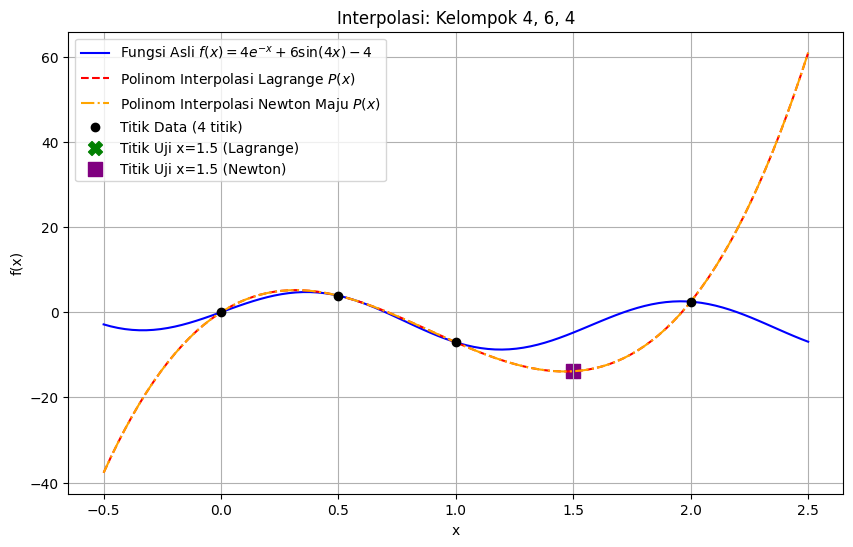

In [27]:
# Buat range x yang halus untuk plotting kurva
x_plot = np.linspace(min(x_data)-0.5, max(x_data)+0.5, 100)
y_plot_asli = f(x_plot)
y_plot_lagrange = [lagrange_interpolation(x_data, y_data, xp) for xp in x_plot]
y_plot_newton = [newton_forward_interpolation(x_data, y_data, xp) for xp in x_plot]

plt.figure(figsize=(10, 6))

# 1. Plot Fungsi Asli
plt.plot(x_plot, y_plot_asli, label=f'Fungsi Asli $f(x)={a}e^{{-x}} + {b}\\sin({c}x) - {d}$', color='blue')

# 2. Plot Polinom Lagrange
plt.plot(x_plot, y_plot_lagrange, label='Polinom Interpolasi Lagrange $P(x)$', color='red', linestyle='--')

# 3. Plot Polinom Newton Maju
plt.plot(x_plot, y_plot_newton, label='Polinom Interpolasi Newton Maju $P(x)$', color='orange', linestyle='-.')

# 4. Plot Titik Data (Scatter)
plt.scatter(x_data, y_data, color='black', zorder=5, label='Titik Data (4 titik)')

# 5. Plot Titik Uji
plt.scatter(x_uji, y_hasil_lagrange, color='green', marker='X', s=100, label=f'Titik Uji x={x_uji} (Lagrange)')
plt.scatter(x_uji, y_hasil_newton, color='purple', marker='s', s=100, label=f'Titik Uji x={x_uji} (Newton)')

plt.title(f"Interpolasi: Kelompok 4, 6, 4")
plt.xlabel("x")
plt.ylabel("f(x)")
plt.legend()
plt.grid(True)
plt.show()

In [23]:
error_abs = abs(y_sejati - y_hasil_lagrange)

print("--- Analisis Error ---")
print(f"Nilai Sejati      : {y_sejati:.8f}")
print(f"Nilai Interpolasi : {y_hasil_lagrange:.8f}")
print(f"Error Mutlak      : {error_abs:.8f}")
print("Kesimpulan: Semakin kecil error, semakin akurat polinom interpolasi di titik tersebut.")

--- Analisis Error ---
Nilai Sejati      : -4.78397235
Nilai Interpolasi : -13.86648036
Error Mutlak      : 9.08250801
Kesimpulan: Semakin kecil error, semakin akurat polinom interpolasi di titik tersebut.
